In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import missingno as msno
from scipy import stats

# Load Data

In [3]:
df = pd.read_csv('./data/data.csv')

In [4]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Identify missing values

In [5]:
missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0].index

In [6]:
missing_values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
missing_cols

Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Handling Missing Data
Separate numeric and categorical columns for imputation

In [8]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

In [14]:
numeric_cols

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [15]:
categorical_cols

Index(['Country', 'Status'], dtype='object')

In [9]:
def fill_missing_numeric_rf(input_df, target, feat):
    df_notnull = input_df[input_df[target].notnull()]
    df_null = input_df[input_df[target].isnull()]
    
    X = df_notnull[feat]
    y = df_notnull[target]
    
    X_null = df_null[feat]
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    
    predicted_values = model.predict(X_null)
    input_df.loc[input_df[target].isnull(), target] = predicted_values
    
    return input_df

In [10]:
def fill_missing_categorical_rf(input_df, target, feat):
    df_notnull = input_df[input_df[target].notnull()]
    df_null = input_df[input_df[target].isnull()]
    
    X = df_notnull[feat]
    y = df_notnull[target]
    
    # Encode target column if it's categorical
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    X_null = df_null[feat]
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)
    
    predicted_values = model.predict(X_null)
    input_df.loc[input_df[target].isnull(), target] = le.inverse_transform(predicted_values)
    
    return input_df

In [11]:
for column in missing_cols:
    if column in numeric_cols:
        features = list(set(numeric_cols) - {column})
        df = fill_missing_numeric_rf(df, column, features)
    elif column in categorical_cols:
        features = list(set(numeric_cols) - {column})
        df = fill_missing_categorical_rf(df, column, features)

In [12]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Dealing with outliers
First, do some visualization

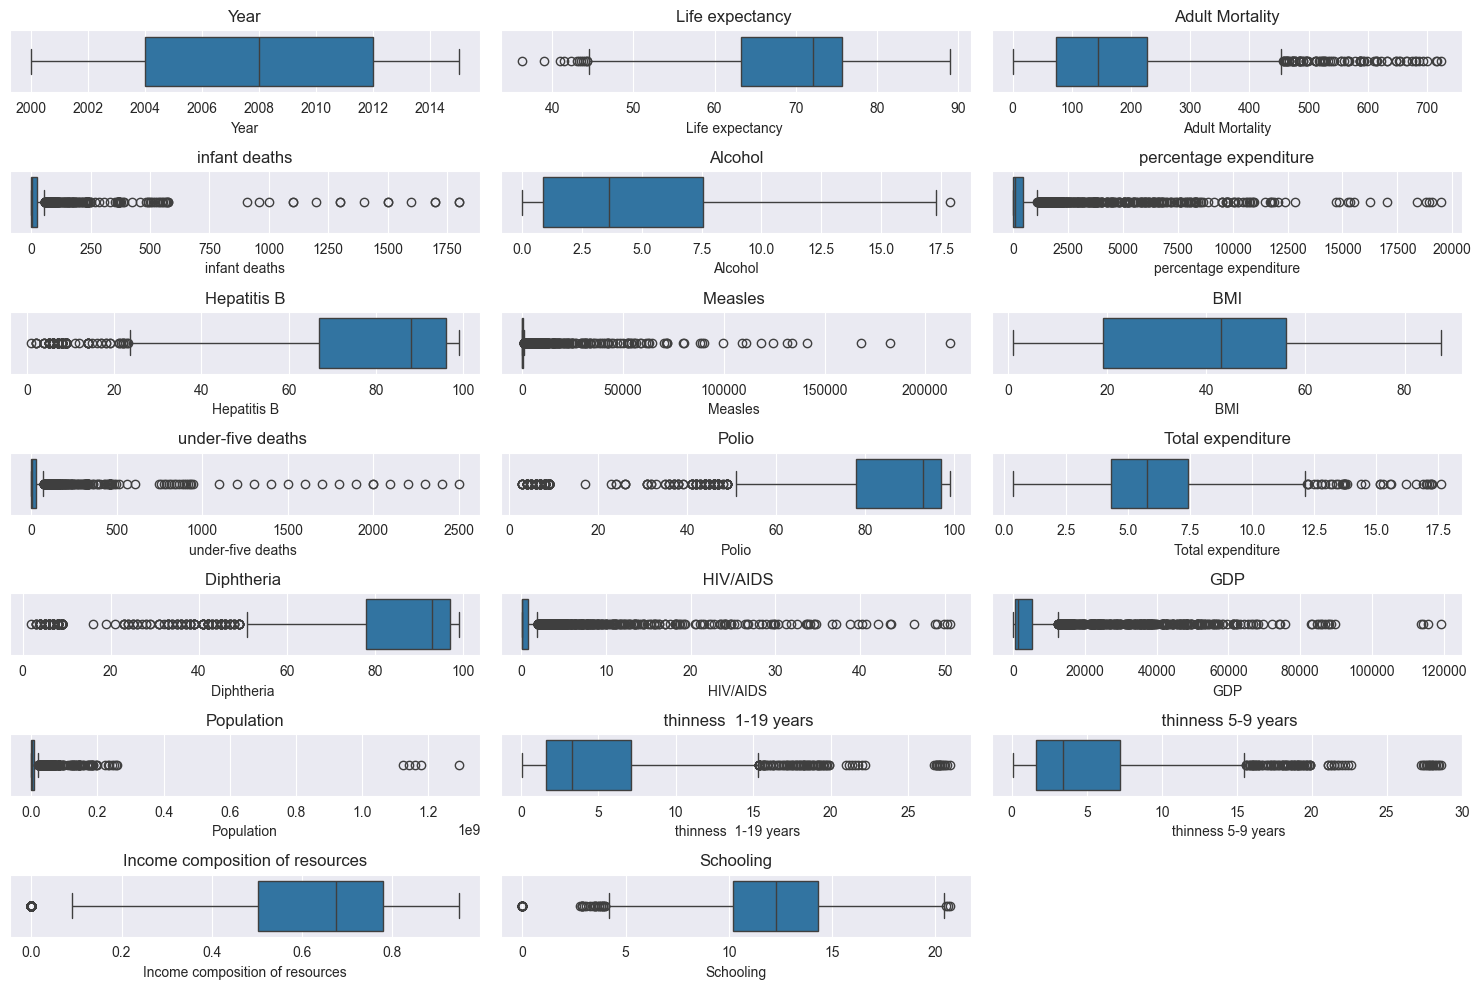

In [13]:
plt.figure(figsize=(15, 10))

# Plot box plots for each numerical column
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()